In [26]:
""" 
Imports
"""

import pandas as pd

In [27]:

# Arquivos a serem carregados
path = '../archive/'
file_names = [f"BO_{year}_{part}.csv" for year in range(2007, 2014) for part in range(1, 3)]
file_names += ["BO_2015.csv",'BO_2016.csv']

# Carregar dados do CSV
# pd.read_csv: Lê os arquivos CSV.
# Amostragem (sample): Reduz a dimensão dos dados para facilitar a análise e economizar memória/processamento.
# Concatenação (pd.concat): Junta os DataFrames amostrados em um único conjunto.

def load_and_sample_files(file_names,path, sample_fraction=0.05):
    sampled_dfs = []
    for file in file_names:
        print(file)
        try:
            df = pd.read_csv(path+file,low_memory=False)
            
            sampled_df = df.sample(frac=sample_fraction, random_state=1)
            sampled_dfs.append(sampled_df)
        except FileNotFoundError:
            print(f"File {file} not found.")
    return pd.concat(sampled_dfs, ignore_index=True)

# Arquivos no diretório
sampled_data = load_and_sample_files(file_names,path)

sampled_data.count()


BO_2007_1.csv
BO_2007_2.csv
BO_2008_1.csv
BO_2008_2.csv
BO_2009_1.csv
BO_2009_2.csv
BO_2010_1.csv
BO_2010_2.csv
BO_2011_1.csv
BO_2011_2.csv
BO_2012_1.csv
BO_2012_2.csv
BO_2013_1.csv
BO_2013_2.csv
BO_2015.csv
BO_2016.csv


NUM_BO                    643429
ANO_BO                    643429
ID_DELEGACIA              643429
NOME_DEPARTAMENTO         643429
NOME_SECCIONAL            643429
DELEGACIA                 643429
NOME_DEPARTAMENTO_CIRC    643429
NOME_SECCIONAL_CIRC       643429
NOME_DELEGACIA_CIRC       643429
ANO                       643429
MES                       643429
DATA_OCORRENCIA_BO        562848
HORA_OCORRENCIA_BO        470462
FLAG_STATUS               643429
RUBRICA                   643429
DESDOBRAMENTO              30310
CONDUTA                   472915
LATITUDE                  343690
LONGITUDE                 343690
CIDADE                    643429
LOGRADOURO                643425
NUMERO_LOGRADOURO         611230
FLAG_STATUS.1             643426
DESCR_TIPO_PESSOA         565555
CONT_PESSOA               565554
SEXO_PESSOA               565555
IDADE_PESSOA              402309
COR                       413534
DESCR_PROFISSAO           318418
DESCR_GRAU_INSTRUCAO      322032
Unnamed: 3

In [28]:
sampled_data = sampled_data.loc[:, ~sampled_data.columns.str.contains('^Unnamed')]
sampled_data.dropna()
sampled_data['IDADE_PESSOA'] = pd.to_numeric(sampled_data['IDADE_PESSOA'].str.extract('(\d+)')[0], errors='coerce')
# Save the sampled data into a new CSV file
output_file = "sampled_crime_reports.csv"
sampled_data['DATA_OCORRENCIA_BO'] = pd.to_datetime(sampled_data['DATA_OCORRENCIA_BO'], errors='coerce').dropna()
sampled_data.to_csv(output_file, index=False)
output_file

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Giovani\AppData\Local\Temp\ipykernel_13508\1294222011.py:3: SyntaxWarning: invalid escape sequence '\d'
  sampled_data['IDADE_PESSOA'] = pd.to_numeric(sampled_data['IDADE_PESSOA'].str.extract('(\d+)')[0], errors='coerce')
C:\Users\Giovani\AppData\Local\Temp\ipykernel_13508\1294222011.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sampled_data['DATA_OCORRENCIA_BO'] = pd.to_datetime(sampled_data['DATA_OCORRENCIA_BO'], errors='coerce').dropna()


'sampled_crime_reports.csv'

In [29]:
sampled_data['CIDADE'].value_counts().head(20)

CIDADE
S.PAULO                                     386646
SÃO PAULO                                    33721
GUARULHOS                                    28946
S.BERNARDO DO CAMPO                          22535
S.ANDRE                                      21012
OSASCO                                       19925
DIADEMA                                      13349
MAUA                                          9033
CARAPICUIBA                                   7728
MOGI DAS CRUZES                               7707
TABOAO DA SERRA                               7308
BARUERI                                       6408
SUZANO                                        6081
ITAQUAQUECETUBA                               5653
COTIA                                         5300
EMBU                                          4894
S.CAETANO DO SUL                              4701
São Paulo                                     3905
ITAPEVI                                       3798
ITAPECERICA DA SERRA    

In [30]:
sampled_data.columns
[['DESCR_TIPO_PESSOA',
 'IDADE_PESSOA',
 'DESCR_GRAU_INSTRUCAO', 
 'RUBRICA', 
 'CIDADE',
 'SEXO_PESSOA',
 'COR',
 'DESCR_PROFISSAO',
'CONDUTA']]

[['DESCR_TIPO_PESSOA',
  'IDADE_PESSOA',
  'DESCR_GRAU_INSTRUCAO',
  'RUBRICA',
  'CIDADE',
  'SEXO_PESSOA',
  'COR',
  'DESCR_PROFISSAO',
  'CONDUTA']]

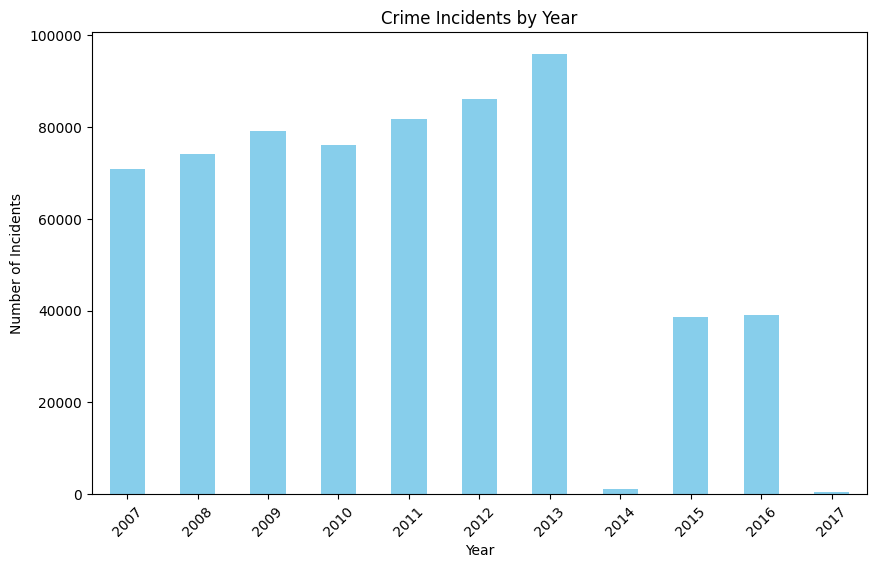

In [31]:
import matplotlib.pyplot as plt

def plot_crime_incidents_by_year(data):
    data['ANO_BO'] = data['ANO_BO'].astype(int)  # Ensure the year column is of type int
    incidents_by_year = data['ANO_BO'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    incidents_by_year.plot(kind='bar', color='skyblue')
    plt.title('Crime Incidents by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.show()

plot_crime_incidents_by_year(sampled_data)


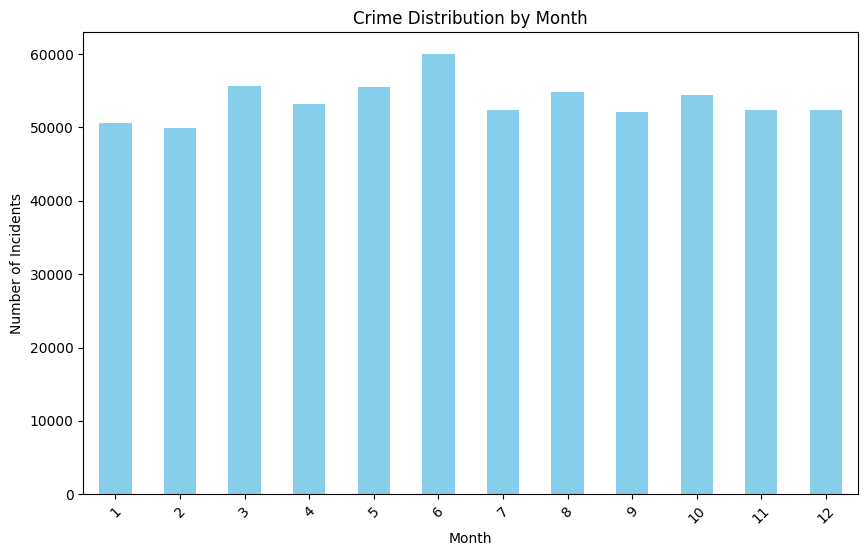

In [32]:
def plot_crime_distribution_by_month(data):
    data['MES'] = data['MES'].astype(int)  # Ensure the month column is of type int
    incidents_by_month = data['MES'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    incidents_by_month.plot(kind='bar', color='skyblue')
    plt.title('Crime Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.show()

plot_crime_distribution_by_month(sampled_data)


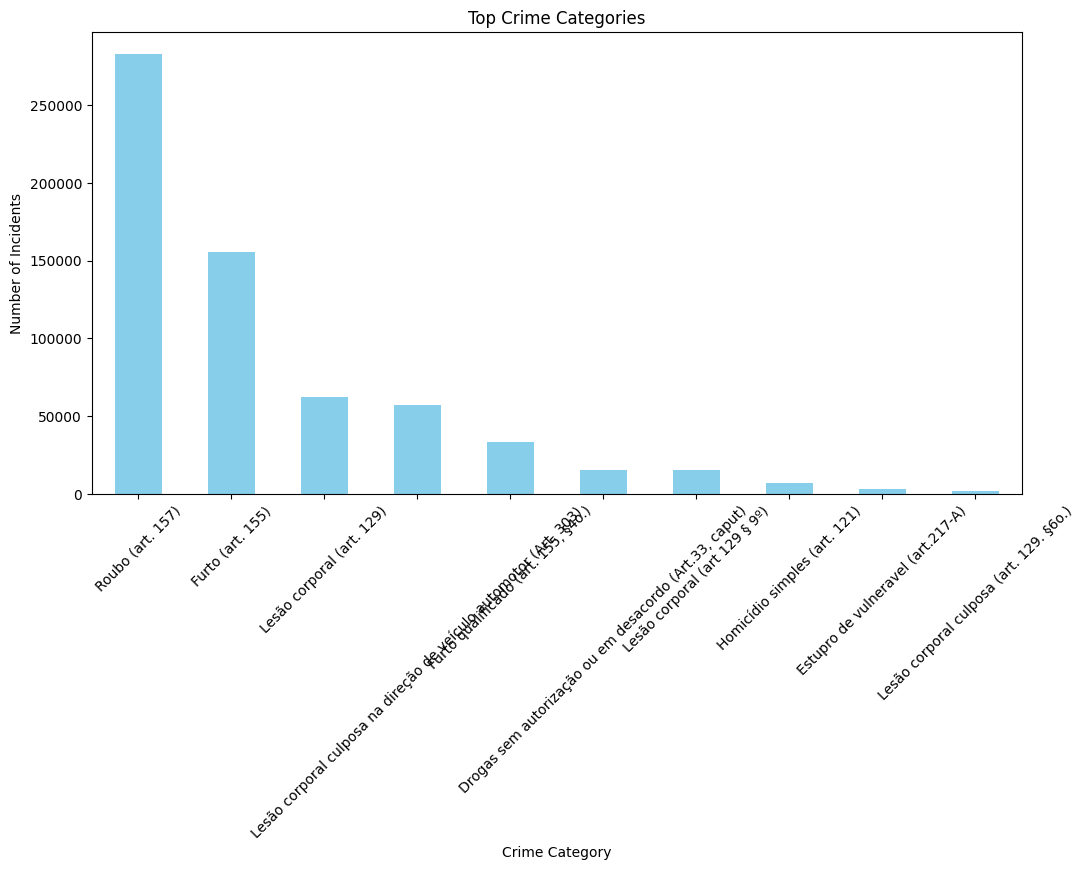

In [33]:
def plot_crime_categories(data, top_n=10):
    crime_categories = data['RUBRICA'].value_counts().head(top_n)

    plt.figure(figsize=(12, 6))
    crime_categories.plot(kind='bar', color='skyblue')
    plt.title('Top Crime Categories')
    plt.xlabel('Crime Category')
    plt.ylabel('Number of Incidents')
    plt.xticks(rotation=45)
    plt.show()

plot_crime_categories(sampled_data)


In [34]:
sampled_data[['LATITUDE', 'LONGITUDE', 'ANO_BO', 'MES']].dropna()

LATITUDE  \
10      Informação restrita (art. 31 da LAI)   
15      Informação restrita (art. 31 da LAI)   
21      Informação restrita (art. 31 da LAI)   
73      Informação restrita (art. 31 da LAI)   
172     Informação restrita (art. 31 da LAI)   
...                                      ...   
643422                            -23.578709   
643425                            -23.615023   
643426                            -23.598358   
643427                            -23.708643   
643428                            -23.555475   

                                   LONGITUDE  ANO_BO  MES  
10      Informação restrita (art. 31 da LAI)    2007    3  
15      Informação restrita (art. 31 da LAI)    2007    1  
21      Informação restrita (art. 31 da LAI)    2007    1  
73      Informação restrita (art. 31 da LAI)    2007    1  
172     Informação restrita (art. 31 da LAI)    2007    4  
...                                      ...     ...  ...  
643422                            -46.522184    2016   12  
643425                            -46.617397    2016    5  
643426                            -46.487426    2016    1  
643427                            -46.546221    2016   11  
643428                            -46.635936    2016   11  

[343690 rows x 4 columns]

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Carregar o dataset
df = pd.read_csv('sampled_crime_reports.csv', low_memory=False)

# Definir as colunas relevantes
columns_for_clustering = ['DESCR_TIPO_PESSOA', 'IDADE_PESSOA', 'DESCR_GRAU_INSTRUCAO', 
                          'RUBRICA', 'CIDADE', 'SEXO_PESSOA', 'COR', 
                          'DESCR_PROFISSAO', 'CONDUTA']

# Função para limpar e pré-processar os dados
def clean_and_preprocess_data(data):
    # Selecionar as colunas relevantes
    data = data[columns_for_clustering]

    # Limpar a coluna 'IDADE_PESSOA' (extrair valores numéricos)
    if data['IDADE_PESSOA'].dtype == 'object':
        data['IDADE_PESSOA'] = pd.to_numeric(data['IDADE_PESSOA'].str.extract(r'(\d+)')[0], errors='coerce')
    else:
        data['IDADE_PESSOA'] = pd.to_numeric(data['IDADE_PESSOA'], errors='coerce')

    # Imputar valores ausentes com a estratégia mais frequente
    imputer = SimpleImputer(strategy='most_frequent')
    data = pd.DataFrame(imputer.fit_transform(data), columns=columns_for_clustering)

    # Codificar colunas categóricas usando LabelEncoder
    label_encoders = {}
    for column in columns_for_clustering:
        if data[column].dtype == 'object':
            label_encoders[column] = LabelEncoder()
            data[column] = label_encoders[column].fit_transform(data[column])

    # Escalar os dados (normalização)
    scaler = StandardScaler()
    data[['IDADE_PESSOA']] = scaler.fit_transform(data[['IDADE_PESSOA']])
    
    return data, label_encoders, scaler

# Aplicar a limpeza e pré-processamento
cleaned_data, label_encoders, scaler = clean_and_preprocess_data(df)

# Exibir as primeiras linhas dos dados limpos
print(cleaned_data.head())

C:\Users\Giovani\AppData\Local\Temp\ipykernel_13508\3371691434.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IDADE_PESSOA'] = pd.to_numeric(data['IDADE_PESSOA'], errors='coerce')


   DESCR_TIPO_PESSOA  IDADE_PESSOA  DESCR_GRAU_INSTRUCAO  RUBRICA  CIDADE  \
0                 12     -0.308325                     2       37      51   
1                 16      2.240569                     6       19     134   
2                 16     -0.435770                     2       19     134   
3                  9     -0.308325                     2       19     190   
4                 12     -0.308325                     2       37     134   

   SEXO_PESSOA  COR  DESCR_PROFISSAO  CONDUTA  
0            2    3              583        6  
1            1    3              349        5  
2            1    6              102       16  
3            3    3              583       13  
4            3    3              583       16  


In [36]:
from sklearn.cluster import KMeans

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Perform KMeans clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cleaned_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Display the first few rows with the cluster labels
print(cleaned_data.head())


   DESCR_TIPO_PESSOA  IDADE_PESSOA  DESCR_GRAU_INSTRUCAO  RUBRICA  CIDADE  \
0                 12     -0.308325                     2       37      51   
1                 16      2.240569                     6       19     134   
2                 16     -0.435770                     2       19     134   
3                  9     -0.308325                     2       19     190   
4                 12     -0.308325                     2       37     134   

   SEXO_PESSOA  COR  DESCR_PROFISSAO  CONDUTA  Cluster  
0            2    3              583        6        2  
1            1    3              349        5        0  
2            1    6              102       16        1  
3            3    3              583       13        2  
4            3    3              583       16        2  


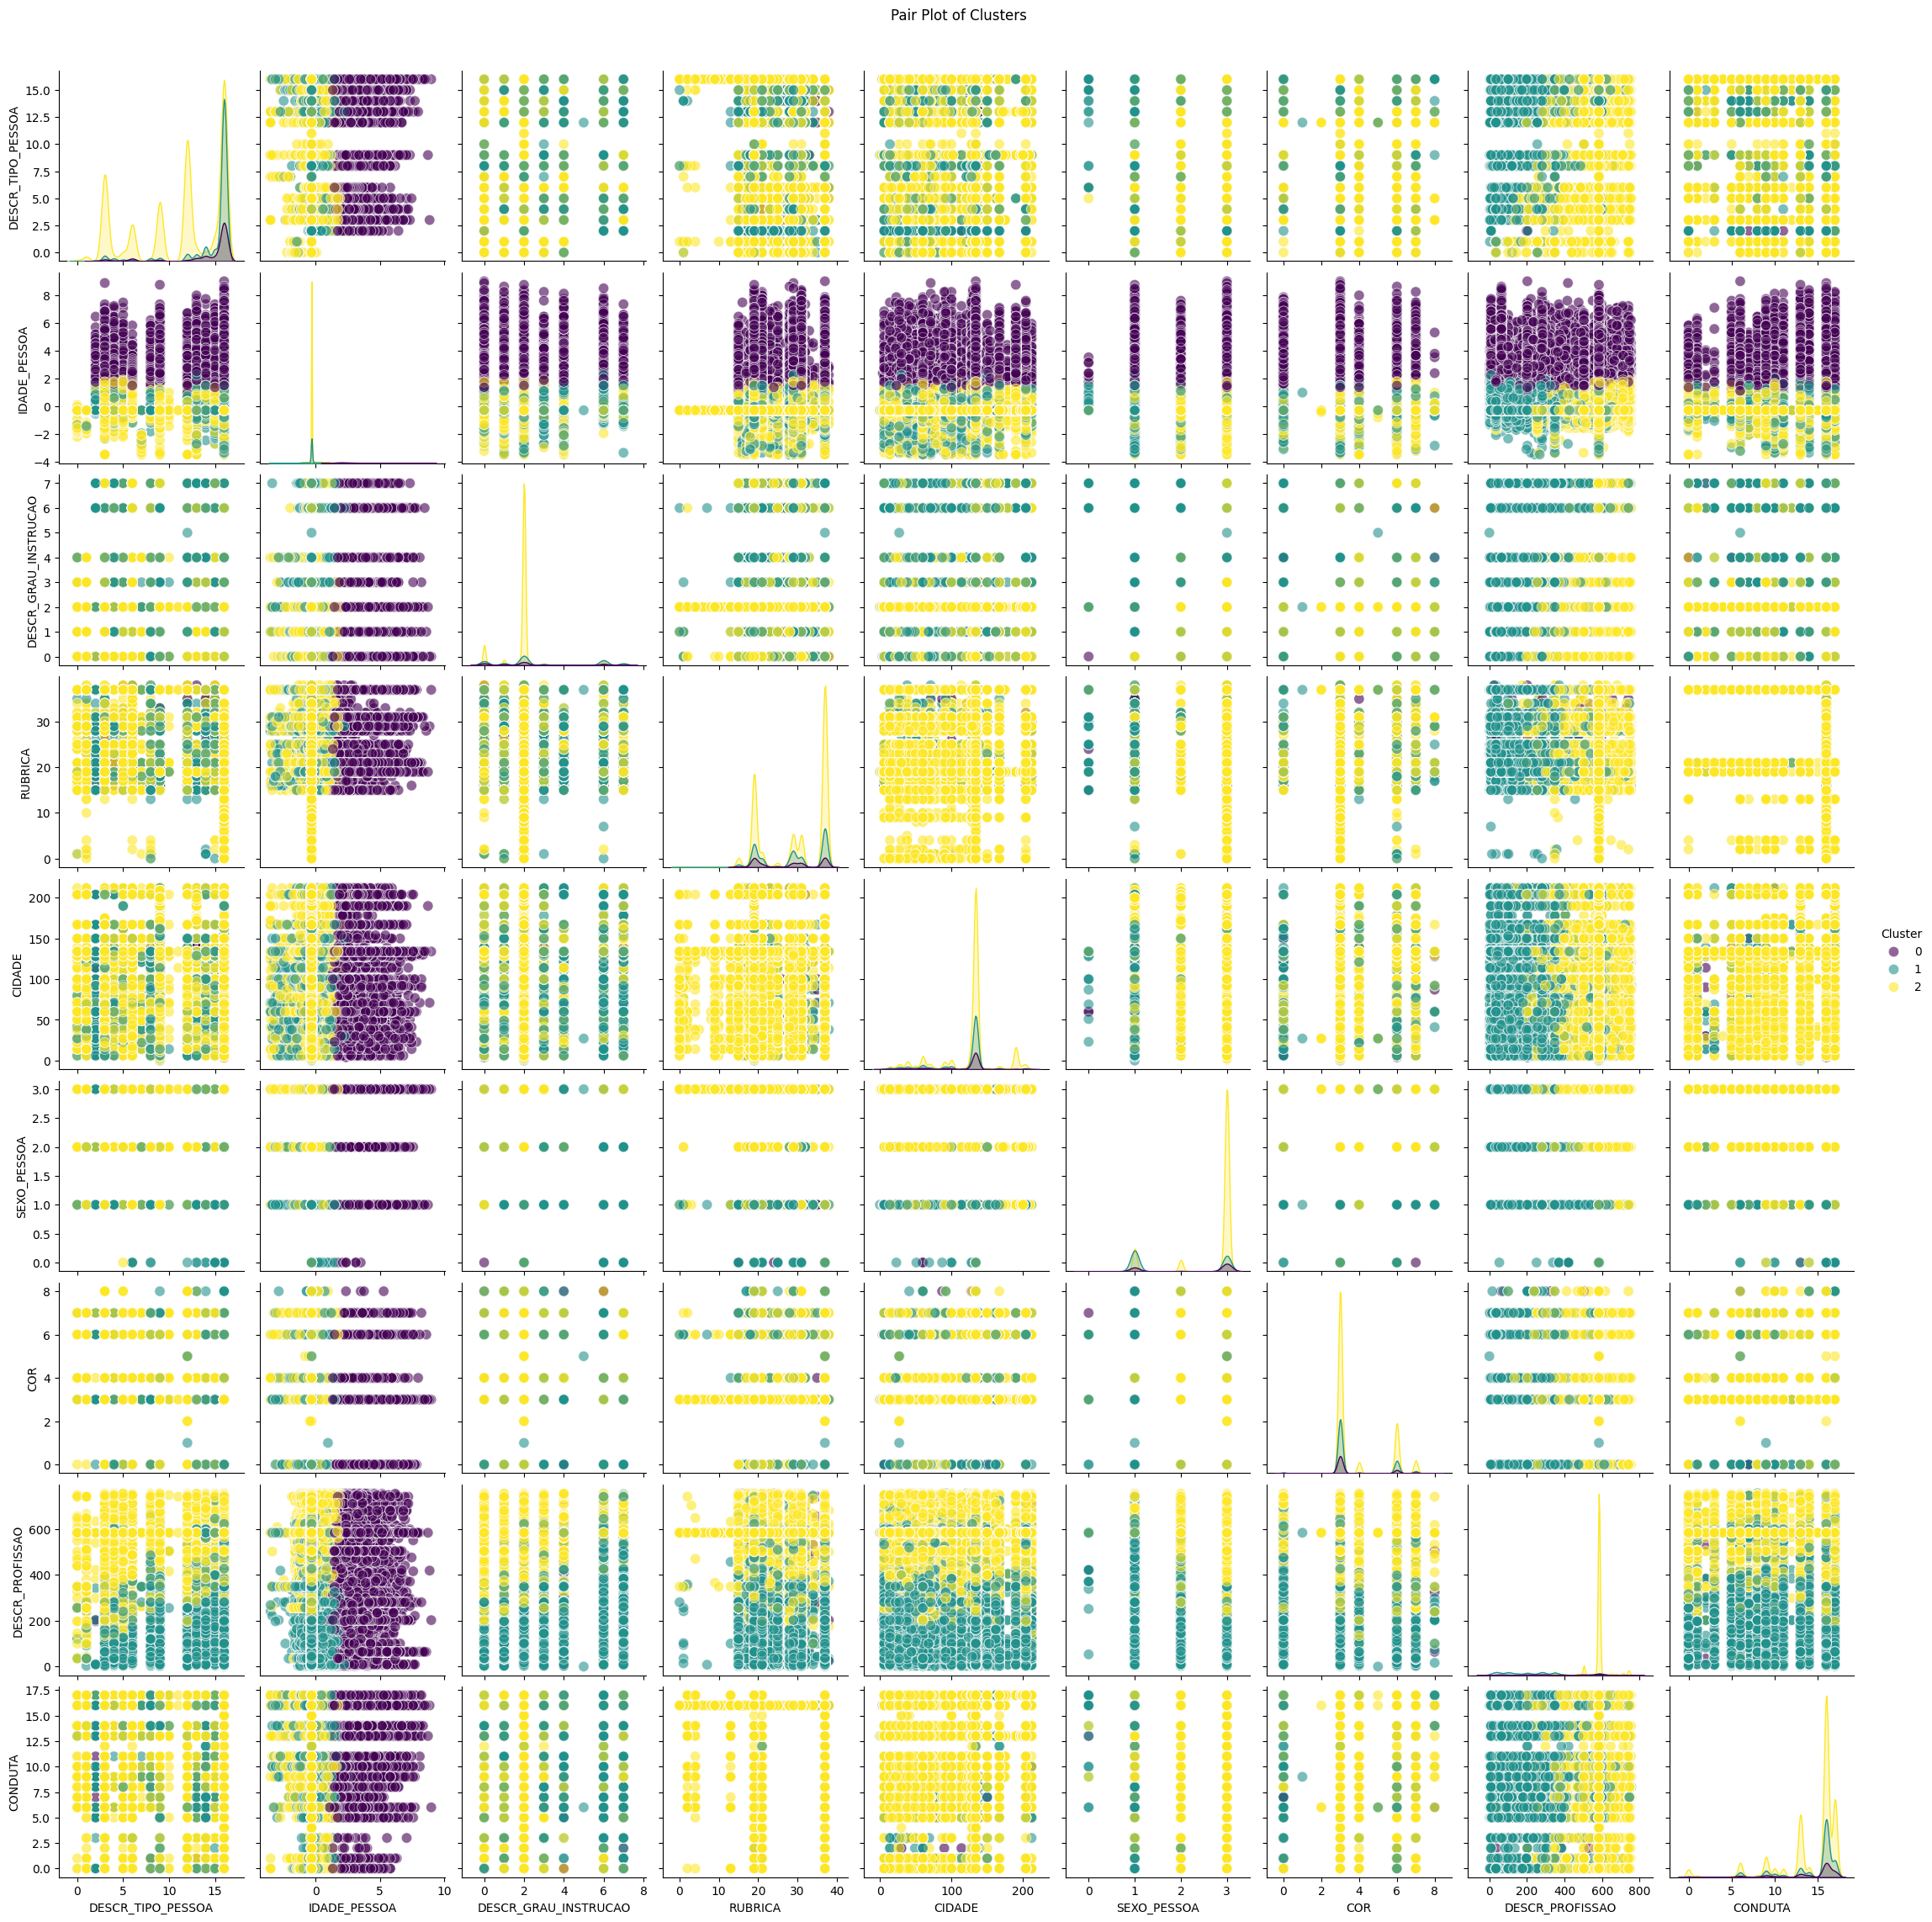

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pair plot of selected features colored by cluster
sns.pairplot(cleaned_data, vars=[
        'DESCR_TIPO_PESSOA',
        'IDADE_PESSOA',
        'DESCR_GRAU_INSTRUCAO', 
        'RUBRICA', 
        'CIDADE',
        'SEXO_PESSOA',
        'COR',
        'DESCR_PROFISSAO',
        'CONDUTA'
        ], hue='Cluster', palette='viridis', plot_kws={'alpha':0.6, 's':80})
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()


In [38]:
# Add the cluster labels to the original dataset
df['Cluster'] = cleaned_data['Cluster']

# Analyze the characteristics of each cluster
def analyze_clusters(data, label_encoders):
    cluster_analysis = data.groupby('Cluster').mean()
    for column in label_encoders:
        cluster_analysis[column] = cluster_analysis[column].map(lambda x: label_encoders[column].inverse_transform([int(x)])[0])
    return cluster_analysis

# Perform the cluster analysis
cluster_analysis = analyze_clusters(cleaned_data, label_encoders)

# Display the cluster analysis
print(cluster_analysis)


            DESCR_TIPO_PESSOA  IDADE_PESSOA  \
Cluster                                       
0        Representante                  2.0   
1        Representante                  0.0   
2        Encontrado                     0.0   

                             DESCR_GRAU_INSTRUCAO  \
Cluster                                             
0        2 Grau completo                            
1        2 Grau completo                            
2        1 Grau incompleto                          

                                                   RUBRICA  \
Cluster                                                      
0        Lesão corporal  de natureza 'GRAVÍSSIMA' (art....   
1                            Lesão corporal (art 129 § 9º)   
2                                Lesão corporal (art. 129)   

                                           CIDADE SEXO_PESSOA  \
Cluster                                                         
0        POÁ                                             

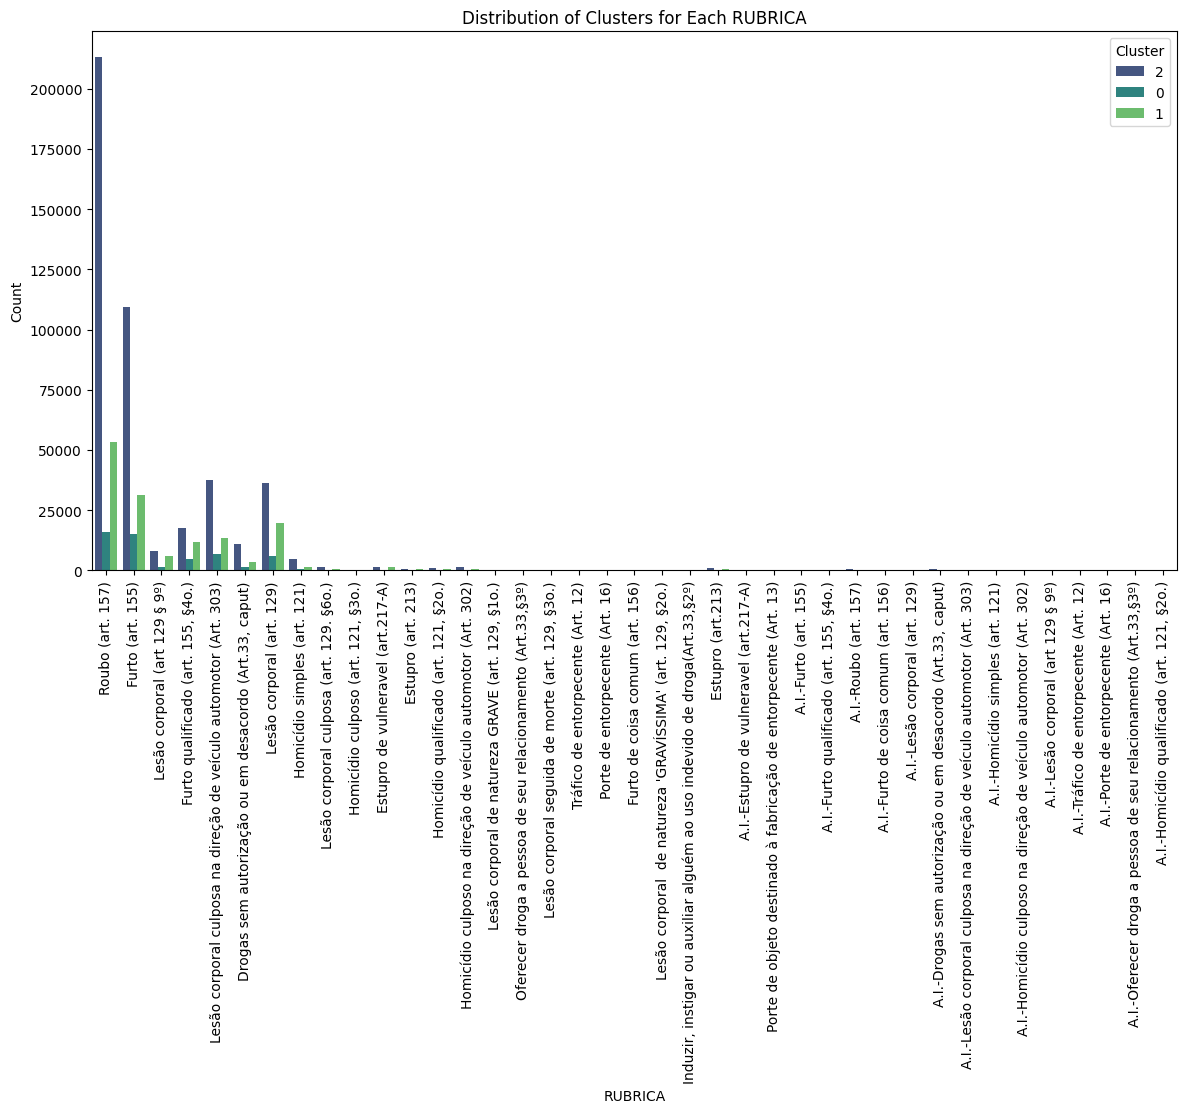

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Cluster column to string type for plotting
df['Cluster'] = df['Cluster'].astype(str)

# Plot the distribution of clusters for each RUBRICA
def plot_clusters_for_rubrica(data):
    plt.figure(figsize=(14, 7))
    sns.countplot(data=data, x='RUBRICA', hue='Cluster', palette='viridis')
    plt.title('Distribution of Clusters for Each RUBRICA')
    plt.xlabel('RUBRICA')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Cluster')
    plt.show()

plot_clusters_for_rubrica(df)


In [42]:
# Arquivos a serem carregados
path = '../ieee-fraud-detection/'
identity_dataset = pd.read_csv(path + 'train_identity.csv')

identity_columns = [
    'TransactionID'
    ,'id_15'
    ,'id_16'
    ,'id_35'
    ,'id_36'
    ,'id_37'
    ,'id_38'
    ,'DeviceType'
    ,'DeviceInfo'
    ,'id_31'
    ,'id_30'
    ,'id_28'
    ,'id_29'
]
df_identity = identity_dataset[identity_columns]
df_identity

TransactionID  id_15     id_16 id_35 id_36 id_37 id_38 DeviceType  \
0             2987004    New  NotFound     T     F     T     T     mobile   
1             2987008    New  NotFound     T     F     F     T     mobile   
2             2987010  Found     Found     F     F     T     T    desktop   
3             2987011    New  NotFound     F     F     T     T    desktop   
4             2987016  Found     Found     T     F     T     T    desktop   
...               ...    ...       ...   ...   ...   ...   ...        ...   
144228        3577521  Found     Found     F     F     T     F     mobile   
144229        3577526    New  NotFound     T     F     T     F     mobile   
144230        3577529    New  NotFound     F     F     T     F     mobile   
144231        3577531  Found     Found     T     F     T     F    desktop   
144232        3577534    New  NotFound     F     F     T     F     mobile   

                                DeviceInfo                    id_31  \
0            SAMSUNG SM-G892A Build/NRD90M      samsung browser 6.2   
1                               iOS Device       mobile safari 11.0   
2                                  Windows              chrome 62.0   
3                                      NaN              chrome 62.0   
4                                    MacOS              chrome 62.0   
...                                    ...                      ...   
144228             F3111 Build/33.3.A.1.97  chrome 66.0 for android   
144229                 A574BL Build/NMF26F  chrome 55.0 for android   
144230  Moto E (4) Plus Build/NMA26.42-152  chrome 65.0 for android   
144231                               MacOS              chrome 66.0   
144232         RNE-L03 Build/HUAWEIRNE-L03  chrome 66.0 for android   

                   id_30  id_28     id_29  
0            Android 7.0    New  NotFound  
1             iOS 11.1.2    New  NotFound  
2                    NaN  Found     Found  
3                    NaN    New  NotFound  
4       Mac OS X 10_11_6  Found     Found  
...                  ...    ...       ...  
144228               NaN  Found     Found  
144229     Android 7.1.1    New  NotFound  
144230               NaN    New  NotFound  
144231   Mac OS X 10_9_5  Found     Found  
144232               NaN    New  NotFound  

[144233 rows x 13 columns]

In [44]:
transaction_dataset = pd.read_csv(path + 'train_transaction.csv')
print(transaction_dataset.columns)
transaction_dataset.info()

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [45]:
"""
- P_ and (R__) emaildomain: purchaser and recipient email domain
- certain transactions don't need recipient, so R_emaildomain is null.

The logic of our labeling is define reported chargeback on the card as fraud transaction (isFraud=1) 
    and transactions posterior to it with either user account, 
    email address or billing address directly linked to these attributes as fraud too. 
    If none of above is reported and found beyond 120 days, 
    then we define as legit transaction (isFraud=0).
"""
transaction_columns = [
    'TransactionID'
    ,'isFraud'
    ,'TransactionDT'
    ,'TransactionAmt'
    ,'ProductCD'
    ,'card1'
    ,'card2'
    ,'card3'
    ,'card4'
    ,'card5'
    ,'addr1'
    ,'addr2'
    ,'P_emaildomain'
    ,'R_emaildomain'
    ,
    
]
df_transaction = transaction_dataset[transaction_columns]
df_transaction

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  addr1  addr2 P_emaildomain  \
0       13926    NaN  150.0    discover  142.0  315.0   87.0           NaN   
1        2755  404.0  150.0  mastercard  102.0  325.0   87.0     gmail.com   
2        4663  490.0  150.0        visa  166.0  330.0   87.0   outlook.com   
3       18132  567.0  150.0  mastercard  117.0  476.0   87.0     yahoo.com   
4        4497  514.0  150.0  mastercard  102.0  420.0   87.0     gmail.com   
...       ...    ...    ...         ...    ...    ...    ...           ...   
590535   6550    NaN  150.0        visa  226.0  272.0   87.0           NaN   
590536  10444  225.0  150.0  mastercard  224.0  204.0   87.0     gmail.com   
590537  12037  595.0  150.0  mastercard  224.0  231.0   87.0     gmail.com   
590538   7826  481.0  150.0  mastercard  224.0  387.0   87.0       aol.com   
590539  15066  170.0  150.0  mastercard  102.0  299.0   87.0     gmail.com   

       R_emaildomain  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
...              ...  
590535           NaN  
590536           NaN  
590537           NaN  
590538           NaN  
590539           NaN  

[590540 rows x 14 columns]

In [46]:
df_merge = df_transaction.merge(df_identity, on='TransactionID', how='left')
df_merge

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ...  id_35  id_36 id_37 id_38  \
0       13926    NaN  150.0    discover  142.0  ...    NaN    NaN   NaN   NaN   
1        2755  404.0  150.0  mastercard  102.0  ...    NaN    NaN   NaN   NaN   
2        4663  490.0  150.0        visa  166.0  ...    NaN    NaN   NaN   NaN   
3       18132  567.0  150.0  mastercard  117.0  ...    NaN    NaN   NaN   NaN   
4        4497  514.0  150.0  mastercard  102.0  ...      T      F     T     T   
...       ...    ...    ...         ...    ...  ...    ...    ...   ...   ...   
590535   6550    NaN  150.0        visa  226.0  ...    NaN    NaN   NaN   NaN   
590536  10444  225.0  150.0  mastercard  224.0  ...    NaN    NaN   NaN   NaN   
590537  12037  595.0  150.0  mastercard  224.0  ...    NaN    NaN   NaN   NaN   
590538   7826  481.0  150.0  mastercard  224.0  ...    NaN    NaN   NaN   NaN   
590539  15066  170.0  150.0  mastercard  102.0  ...    NaN    NaN   NaN   NaN   

       DeviceType                     DeviceInfo                id_31  \
0             NaN                            NaN                  NaN   
1             NaN                            NaN                  NaN   
2             NaN                            NaN                  NaN   
3             NaN                            NaN                  NaN   
4          mobile  SAMSUNG SM-G892A Build/NRD90M  samsung browser 6.2   
...           ...                            ...                  ...   
590535        NaN                            NaN                  NaN   
590536        NaN                            NaN                  NaN   
590537        NaN                            NaN                  NaN   
590538        NaN                            NaN                  NaN   
590539        NaN                            NaN                  NaN   

              id_30 id_28     id_29  
0               NaN   NaN       NaN  
1               NaN   NaN       NaN  
2               NaN   NaN       NaN  
3               NaN   NaN       NaN  
4       Android 7.0   New  NotFound  
...             ...   ...       ...  
590535          NaN   NaN       NaN  
590536          NaN   NaN       NaN  
590537          NaN   NaN       NaN  
590538          NaN   NaN       NaN  
590539          NaN   NaN       NaN  

[590540 rows x 26 columns]

In [47]:
columns = ['isFraud'
    #,'TransactionDT'
    ,'ProductCD'
    ,'card4'
    ,'id_15'
    ,'id_16'
    ,'id_35'
    ,'id_36'
    ,'id_37'
    ,'id_38'
    ,'DeviceType'
    ,'DeviceInfo'
    ,'id_31'
    ,'id_30'
    ,'id_28'
    ,'id_29']

for column in columns:
    print(df_merge[column].value_counts())

isFraud
0    569877
1     20663
Name: count, dtype: int64
ProductCD
W    439670
C     68519
R     37699
H     33024
S     11628
Name: count, dtype: int64
card4
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: count, dtype: int64
id_15
Found      67728
New        61612
Unknown    11645
Name: count, dtype: int64
id_16
Found       66324
NotFound    63016
Name: count, dtype: int64
id_35
T    77814
F    63171
Name: count, dtype: int64
id_36
F    134066
T      6919
Name: count, dtype: int64
id_37
T    110452
F     30533
Name: count, dtype: int64
id_38
F    73922
T    67063
Name: count, dtype: int64
DeviceType
desktop    85165
mobile     55645
Name: count, dtype: int64
DeviceInfo
Windows                  47722
iOS Device               19782
MacOS                    12573
Trident/7.0               7440
rv:11.0                   1901
                         ...  
5044A                        1
VS880                        1
SM-J2

In [48]:
# UserID = combinação de card1, addr1, and D1
transaction_dataset['UserID'] = transaction_dataset['card1'].astype(str) + transaction_dataset['addr1'].astype(str) + transaction_dataset['D1'].astype(str)
transaction_dataset['UserID'] = transaction_dataset['UserID'].str.replace('nan', '0').str.replace('.', '')

# Manter apenas as colunas necessárias
transaction_dataset = transaction_dataset[['UserID','TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card4', 'card6', 'addr1', 'addr2', 'P_emaildomain']]

In [49]:
identity_dataset = identity_dataset[['TransactionID', 'id_30', 'id_31', 'DeviceType', 'DeviceInfo']]
identity_dataset.rename(columns={'id_30': 'SisOp', 'id_31': 'Browser'}, inplace=True)

In [50]:
# Normalizar a coluna SisOp
def normalize_sisop_column(serie):
    os_mapping = {
        'ios': 'iOS',
        'android': 'Android',
        'mac': 'Mac',
        'windows': 'Windows',
        'linux': 'Linux'
    }

    def normalize_os(value):
        value = str(value).lower()
        for key in os_mapping:
            if key in value:
                return os_mapping[key]
        return 'Other'
    
    return serie.apply(normalize_os)

identity_dataset['SisOp'] = normalize_sisop_column(identity_dataset['SisOp'])

In [51]:
# Normalizar a coluna Browser
def normalize_browser_column(serie):
    browser_mapping = {
        'chrome': 'Chrome',
        'firefox': 'Firefox',
        'safari': 'Safari',
        'ie': 'Internet Explorer',
        'edge': 'Edge',
        'samsung': 'Samsung',
        'opera': 'Opera'
    }

    def normalize_browser(value):
        value = str(value).lower()
        for key in browser_mapping:
            if key in value:
                return browser_mapping[key]
        return 'Other'
    
    return serie.apply(normalize_browser)

identity_dataset['Browser'] = normalize_browser_column(identity_dataset['Browser'])


In [52]:
# Contagem de transações por usuario
user_transactions_count = transaction_dataset.groupby('UserID').size().reset_index(name='transaction_count')
user_transactions_count.sort_values(by='transaction_count', ascending=False).head(5)

UserID  transaction_count
88310      15885000               7198
242297      9633000               2964
150080      3154000               2897
109940  17188299000               2430
238672   9500204000               1919

In [53]:
browser_transactions_count = identity_dataset.groupby('Browser').size().reset_index(name='transaction_count')
browser_transactions_count.sort_values(by='transaction_count', ascending=False).head()

Browser  transaction_count
0             Chrome              76059
6             Safari              37281
3  Internet Explorer              10018
2            Firefox               7017
1               Edge               6401

In [54]:
# Merge dos datasets
full_dataset = pd.merge(transaction_dataset, identity_dataset, on='TransactionID', how='inner')

In [55]:
# Tamanho dos datasets
print('Transaction Dataset:', transaction_dataset.shape)
print('Identity Dataset:', identity_dataset.shape)
print('Full Dataset:', full_dataset.shape)

Transaction Dataset: (590540, 11)
Identity Dataset: (144233, 5)
Full Dataset: (144233, 15)


In [56]:
print(f"Quantas transações fraudulentas existem no dataset mergeado?\n{full_dataset.isFraud.value_counts().sort_values(ascending=False)}")

Quantas transações fraudulentas existem no dataset mergeado?
isFraud
0    132915
1     11318
Name: count, dtype: int64
